In [1]:
# Cargamos datos
import Loading_data 
from matplotlib import pyplot as plt    
import warnings
warnings.filterwarnings('ignore')


COMUNIDAD_A_CONSIDERAR = 'Madrid'
comunidad = Loading_data.Get_Comunidad(COMUNIDAD_A_CONSIDERAR)
comunidad



/media/sf_git/COVID-19/jupyter/Loading_data.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df,this_df])


,Lugar,Casos,Casos hoy absoluto,Casos hoy variacion respecto ayer,Casos hoy porcentaje,Fallecidos,Fallecidos hoy absoluto,Fallecidos hoy variacion respecto ayer,Fallecidos hoy porcentaje,Tasa Mortalidad,Curados,Curados hoy absoluto,Casos excluidos curados,Proporcion Curados / Casos,UCI,Hospitalizados
Fecha,,,,,,,,,,,,,,,,
2020-04-08,Madrid,42450,1981,235,0.046667,5586,215,-20,0.038489,0.131590,19836,1426.0,22614,0.467279,1450,13289
2020-04-07,Madrid,40469,1746,607,0.043144,5371,235,40,0.043753,0.132719,18410,1088.0,22059,0.454916,1494,13950
2020-04-06,Madrid,38723,1139,-196,0.029414,5136,195,-23,0.037967,0.132634,17322,779.0,21401,0.447331,1510,14501
2020-04-05,Madrid,37584,1335,-726,0.035520,4941,218,-22,0.044121,0.131466,16543,1181.0,21041,0.440161,1499,14551
2020-04-04,Madrid,36249,2061,28,0.056857,4723,240,-68,0.050815,0.130293,15362,1512.0,20887,0.423791,1498,14741
2020-04-03,Madrid,34188,2033,-282,0.059465,4483,308,-2,0.068704,0.131128,13850,1450.0,20338,0.405113,1506,15050
2020-04-02,Madrid,32155,2315,-16,0.071995,4175,310,48,0.074251,0.129840,12400,1573.0,19755,0.385632,1528,15227
2020-04-01,Madrid,29840,2331,-1088,0.078117,3865,262,51,0.067788,0.129524,10827,1497.0,19013,0.362835,1514,15227
2020-03-31,Madrid,27509,3419,2006,0.124287,3603,211,-99,0.058562,0.130975,9330,1029.0,18179,0.339162,1514,15140


In [2]:
import Loading_data 

from Loading_data import Get_Comunidades_List as comunidades
COMUNIDADES = comunidades()
COMUNIDADES

array(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias',
       'Cantabria', 'Castilla La Mancha', 'Castilla y León', 'Cataluña',
       'Ceuta y Melilla', 'C. Valenciana', 'Extremadura', 'Galicia',
       'Madrid', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja'],
      dtype=object)

In [3]:
import pandas as pd


def Get_Dimensions_All_CCAA(Atributos):
    array = []
    for ca in COMUNIDADES: 
        comunidad = Loading_data.Get_Comunidad(ca).head(1)
        comunidad = comunidad.reset_index() # Resets the index, makes factor a column
        temp_dict = {}
        temp_dict['Lugar'] = ca
        for attr in Atributos:
            temp_dict[attr] = comunidad[attr].iloc[0]
        array.append(temp_dict)

    return pd.DataFrame.from_records(array)



In [4]:


def Print_Two_Cordinates_CCAA(df):
    fig,ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax.axhline(y=0, color='blue')
    ax.axvline(x=0, color='blue')

    for k,d in df.groupby('Lugar'):
        ax.scatter(d[df.columns[1]], d[df.columns[2]], label=k)

    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

    ax.set_xlabel(df.columns[1])
    ax.set_ylabel(df.columns[2])
    ax.set_title(df.columns[1]+ ' VS. ' + df.columns[2])
    return plt



In [5]:
from IPython.display import display, HTML


def Comparar_Dos_Dimenciones(Atributos ):
    df = Get_Dimensions_All_CCAA(Atributos)
    plt = Print_Two_Cordinates_CCAA(df)
    plt.show()
    print(  'Total: '  + df.columns[1], df[df.columns[1]].sum() )
    print(  'Total: '  + df.columns[2], df[df.columns[2]].sum() )
    display(HTML(df.sort_values(by=[df.columns[1],df.columns[2]]).to_html()))
    return 

 

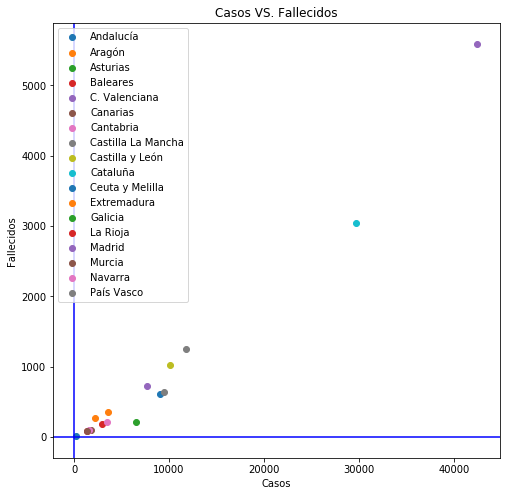

Total: Casos 146690
Total: Fallecidos 14555


,Lugar,Casos,Fallecidos
9,Ceuta y Melilla,177,6
14,Murcia,1326,85
3,Baleares,1412,89
5,Cantabria,1572,92
2,Asturias,1705,102
4,Canarias,1762,91
11,Extremadura,2184,271
17,La Rioja,2951,177
15,Navarra,3467,206
1,Aragón,3549,349


In [6]:
Comparar_Dos_Dimenciones(['Casos', 'Fallecidos'] )   

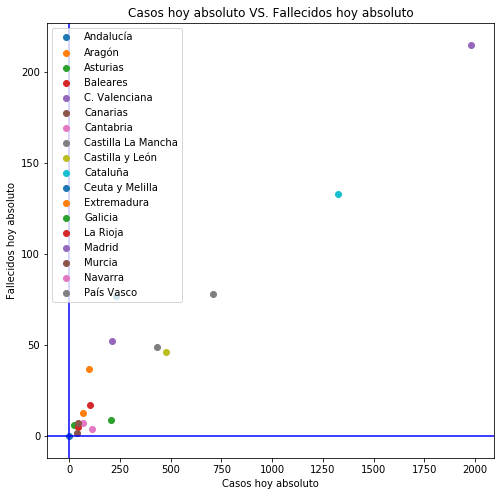

Total: Casos hoy absoluto 6180
Total: Fallecidos hoy absoluto 757


,Lugar,Casos hoy absoluto,Fallecidos hoy absoluto
9,Ceuta y Melilla,2,0
2,Asturias,26,6
4,Canarias,37,2
3,Baleares,43,5
14,Murcia,43,7
11,Extremadura,68,13
5,Cantabria,71,7
1,Aragón,100,37
17,La Rioja,105,17
15,Navarra,112,4


In [7]:
Comparar_Dos_Dimenciones(['Casos hoy absoluto', 'Fallecidos hoy absoluto'])

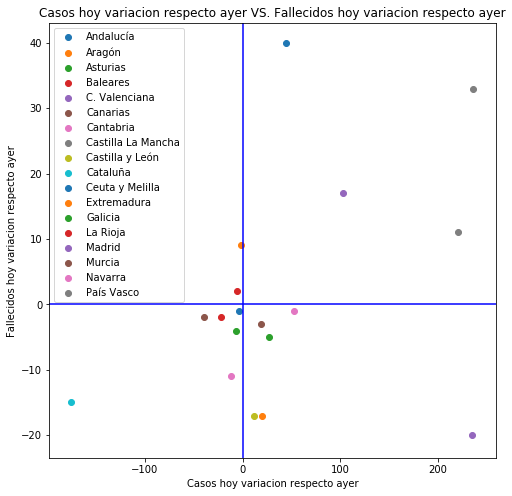

Total: Casos hoy variacion respecto ayer 702
Total: Fallecidos hoy variacion respecto ayer 14


,Lugar,Casos hoy variacion respecto ayer,Fallecidos hoy variacion respecto ayer
8,Cataluña,-175,-15
4,Canarias,-39,-2
17,La Rioja,-22,-2
15,Navarra,-12,-11
2,Asturias,-7,-4
3,Baleares,-6,2
9,Ceuta y Melilla,-4,-1
1,Aragón,-2,9
7,Castilla y León,12,-17
14,Murcia,19,-3


In [8]:
Comparar_Dos_Dimenciones(['Casos hoy variacion respecto ayer', 'Fallecidos hoy variacion respecto ayer'])

In [9]:
# Cargamos datos
import pandas as pd
import Loading_data 

from Loading_data import Get_Comunidades_List as comunidades
COMUNIDADES = comunidades()

def Get_Dimension_CCAA(Dimension):
    dimension_df = pd.DataFrame()
    for ca in COMUNIDADES: 
        df = Loading_data.Get_Comunidad(ca)
        df = df.sort_values(by='Fecha')
        df = df.reset_index() # Resets the index, makes factor a column    
        df = df[df["Casos"] >= 100]
        dimension_df[ca] = df[Dimension]
    return dimension_df 


In [10]:
from matplotlib import pyplot as plt    
from IPython.display import display, HTML
import pandas as pd

import numpy as np


def compare_charts_median(Dimension,df): 
    short_df = df.tail(1)
    short_df = short_df.T
    short_df.columns = [Dimension]
    short_df

    mean_y = short_df.median(axis=1)[0]
    mean_y= df.tail(1).T.median().values[0]
    x = short_df.index
    y = short_df[Dimension]

    plt.figure(figsize = (10, 5))
    plt.scatter(x, y, c= "red", alpha = 0.5)
    plt.title(Dimension + " by region")
    color = 'blue'
    plt.xticks(rotation=90)
    plt.axhline(mean_y, c = color, alpha = 0.5, lw = 1)
    plt.annotate('Median ' + Dimension+  ' is {}'.format(round(mean_y, 2)),
            xy=(12, mean_y),
            xycoords='data',
            xytext=(50, 50), 
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color = "k", alpha = 0.5),
            color = color)
    return

def compare_charts_time(Dimension,df):
    fig = plt.figure(figsize=(8, 6), dpi=80)
    for ca in df.columns:
        plt.plot(df[ca])
    plt.legend(df.columns)
    fig.suptitle('Comparativa de: '+Dimension+', igualando los dias', fontsize=20)
    plt.show()
    return 

def Report_Location(Dimension):
    # Ger Data
    df = Get_Dimension_CCAA(Dimension)
    # Compare chart
    compare_charts_time(Dimension,df)
    # Compare median chart
    compare_charts_median(Dimension,df)
    
    with pd.option_context("display.max_rows", 1000):
        display(HTML(df.to_html()))
    return 


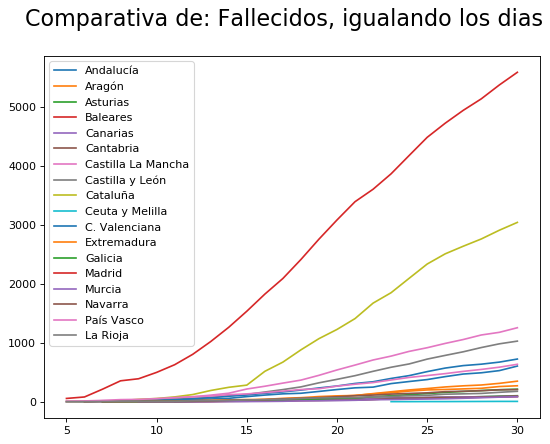

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Castilla La Mancha,Castilla y León,Cataluña,Ceuta y Melilla,C. Valenciana,Extremadura,Galicia,Madrid,Murcia,Navarra,País Vasco,La Rioja
5,0,NaN,NaN,NaN,NaN,NaN,1,NaN,4,NaN,NaN,NaN,NaN,56,NaN,NaN,11,2
6,0,NaN,NaN,NaN,NaN,NaN,5,1.0,4,NaN,NaN,NaN,NaN,81,NaN,0.0,14,2
7,7,11.0,1.0,NaN,1.0,NaN,17,9.0,12,NaN,5.0,2.0,2.0,213,NaN,1.0,23,4
8,11,12.0,1.0,NaN,2.0,NaN,17,12.0,18,NaN,13.0,3.0,3.0,355,NaN,2.0,36,5
9,19,13.0,1.0,1.0,3.0,NaN,28,22.0,41,NaN,22.0,6.0,3.0,390,0.0,3.0,40,5
10,23,15.0,1.0,2.0,3.0,NaN,42,29.0,55,NaN,24.0,8.0,4.0,498,0.0,4.0,53,5
11,30,17.0,2.0,2.0,4.0,1.0,62,43.0,82,NaN,33.0,10.0,5.0,628,0.0,5.0,71,7
12,40,22.0,5.0,4.0,7.0,2.0,84,55.0,122,NaN,50.0,12.0,9.0,804,1.0,9.0,85,15
13,47,24.0,8.0,4.0,9.0,5.0,112,74.0,191,NaN,69.0,14.0,12.0,1021,1.0,14.0,97,18
14,58,32.0,12.0,10.0,11.0,6.0,145,102.0,245,NaN,94.0,18.0,18.0,1263,2.0,24.0,120,22


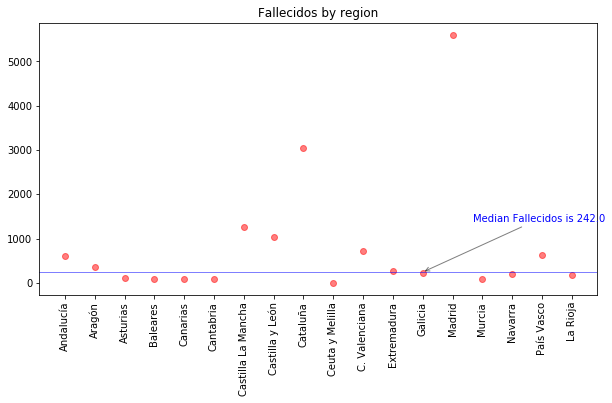

In [11]:
Report_Location("Fallecidos")

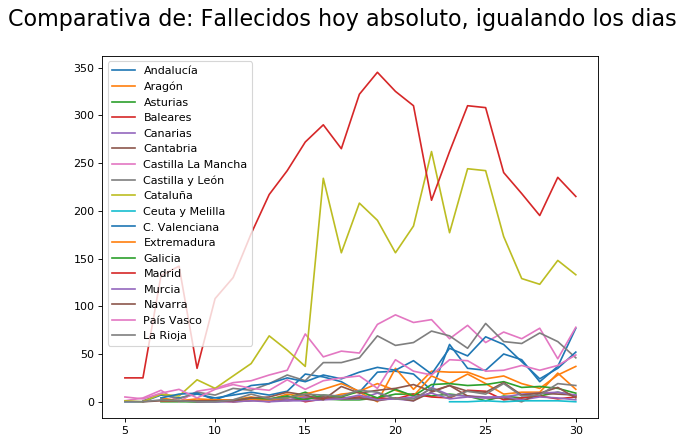

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Castilla La Mancha,Castilla y León,Cataluña,Ceuta y Melilla,C. Valenciana,Extremadura,Galicia,Madrid,Murcia,Navarra,País Vasco,La Rioja
5,0,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,25,NaN,NaN,5,0
6,0,NaN,NaN,NaN,NaN,NaN,4,1.0,0,NaN,NaN,NaN,NaN,25,NaN,0.0,3,0
7,7,4.0,0.0,NaN,1.0,NaN,12,8.0,8,NaN,4.0,1.0,2.0,132,NaN,1.0,9,2
8,4,1.0,0.0,NaN,1.0,NaN,0,3.0,6,NaN,8.0,1.0,1.0,142,NaN,1.0,13,1
9,8,1.0,0.0,0.0,1.0,NaN,11,10.0,23,NaN,9.0,3.0,0.0,35,0.0,1.0,4,0
10,4,2.0,0.0,1.0,0.0,NaN,14,7.0,14,NaN,2.0,2.0,1.0,108,0.0,1.0,13,0
11,7,2.0,1.0,0.0,1.0,0.0,20,14.0,27,NaN,9.0,2.0,1.0,130,0.0,1.0,18,2
12,10,5.0,3.0,2.0,3.0,1.0,22,12.0,40,NaN,17.0,2.0,4.0,176,1.0,4.0,14,8
13,7,2.0,3.0,0.0,2.0,3.0,28,19.0,69,NaN,19.0,2.0,3.0,217,0.0,5.0,12,3
14,11,8.0,4.0,6.0,2.0,1.0,33,28.0,54,NaN,25.0,4.0,6.0,242,1.0,10.0,23,4


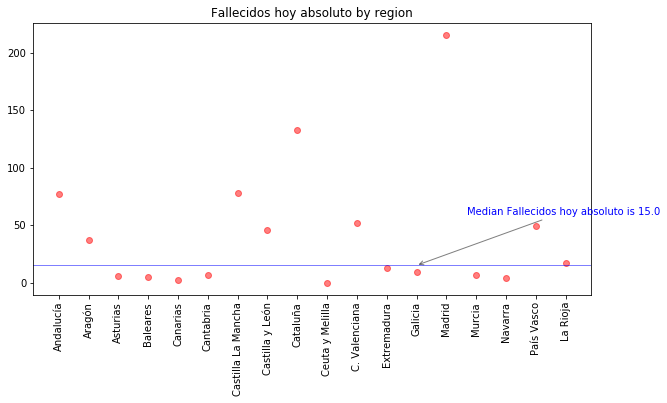

In [12]:
Report_Location("Fallecidos hoy absoluto") 

In [ ]:
Report_Location("Tasa Mortalidad")

In [ ]:
Report_Location("Casos") 

In [ ]:
Report_Location("Casos hoy absoluto")

In [ ]:
Report_Location("Casos hoy variacion respecto ayer")

In [ ]:
Report_Location("Proporcion Curados / Casos")

In [ ]:
Report_Location("Curados")

## ¿Hemos alcanzado el pico de la curva?


### Casos totales españa, evolucion


In [ ]:
# Casos totales españa, evolucion
import Loading_data 

Dimension = 'Fallecidos'
df = Get_Dimension_CCAA(Dimension)

df['Total Fallecidos'] = df.sum(axis=1)
df['Total Fallecidos']

CONVERT_INT_COLUMNS = ['Total Fallecidos']
for column in CONVERT_INT_COLUMNS :
    df[column] = df[column].fillna(0)
    df[column] = df[column].astype(np.int64)
        
#df['MA variation']=  df['MA'] - df['MA'].shift(1)
df['Total Fallecidos hoy absoluto'] = df['Total Fallecidos'] - df['Total Fallecidos'].shift(1)
df['MA Total Fallecidos hoy absoluto'] = df['Total Fallecidos hoy absoluto'].rolling(window=4).mean()

df['Variacion MA Total Fallecidos hoy absoluto'] = df['MA Total Fallecidos hoy absoluto'] - df['MA Total Fallecidos hoy absoluto'].shift(1)

df_plt = df[['Total Fallecidos hoy absoluto','MA Total Fallecidos hoy absoluto']]
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df_plt, marker='o') 
plt.legend(df_plt.columns)
fig.suptitle( "Total fallecidos en España", fontsize=20)

df[['Total Fallecidos',
    'Total Fallecidos hoy absoluto',
    'MA Total Fallecidos hoy absoluto',
    'Variacion MA Total Fallecidos hoy absoluto']]


In [ ]:
def report_single_location_single_dimension(location,dimension):
    MOVING_AVERAGE_WINDOW = 4
    Dimension = 'Fallecidos'

    df = pd.DataFrame()
    df[dimension] = Get_Dimension_CCAA(dimension)[location]
    df['Moving Average ' + dimension] = df[dimension].rolling(window=4).mean()

    display(HTML("<h2>Analisis de ''" + dimension +"'', en " + location + "</h2>"))
    fig = plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(df, marker='o') 
    plt.legend(df.columns)
    fig.suptitle( dimension + ' in ' + location, fontsize=20)

    display(HTML(pd.DataFrame(df).to_html()))
    return  


### Casos totales españa, evolucion


In [ ]:

dimension = 'Fallecidos hoy absoluto'
report_single_location_single_dimension('Madrid',dimension)

In [ ]:

dimension = 'Fallecidos hoy absoluto'
report_single_location_single_dimension('Cataluña',dimension)

In [ ]:
dimension = 'Fallecidos hoy absoluto'
report_single_location_single_dimension('Castilla y León',dimension)

In [ ]:
from datetime import datetime

COMUNIDAD_A_CONSIDERAR = 'Madrid'
#comunidad = Loading_data.Get_Comunidad(COMUNIDAD_A_CONSIDERAR)


comunidad.head(24).tail(15)['Fallecidos hoy absoluto'].sum()
comunidad['Fecha'] = comunidad.index

date1 = datetime.strptime('2020-03-15', '%Y-%m-%d')
date2 = datetime.strptime('2020-04-01', '%Y-%m-%d')

comunidad.loc[(comunidad['Fecha']>date1) & (comunidad['Fecha']<date2)]['Fallecidos hoy absoluto'].sum()

In [ ]:
dimension = 'Fallecidos hoy absoluto'
report_single_location_single_dimension('Castilla La Mancha',dimension)

# ¿ Son reales estas cifras ? 
 
 Según reportaje de el mundo :https://www.elmundo.es/madrid/2020/04/07/5e8c427d21efa0b1668b45d6.html
 
   Entre los días 15 y 31 de marzo fallecieron en Madrid capital, "por todas las causas", aunque la mayoría por coronavirus, 5.950 personas, cuando en 2019, en el mismo lapso, murieron 1.100 personas

In [ ]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

COMUNIDAD_A_CONSIDERAR = 'Madrid'
comunidad = Loading_data.Get_Comunidad(COMUNIDAD_A_CONSIDERAR)


comunidad.head(24).tail(15)['Fallecidos hoy absoluto'].sum()
comunidad['Fecha'] = comunidad.index

date1 = datetime.strptime('2020-03-15', '%Y-%m-%d')
date2 = datetime.strptime('2020-04-01', '%Y-%m-%d')

madrid_muertos_segun_sanidad = comunidad.loc[(comunidad['Fecha']>date1) & (comunidad['Fecha']<date2)]['Fallecidos hoy absoluto'].sum()
print ("Madrid muertos segun sanidad, segunda quincena de Marzo: " + str(madrid_muertos_segun_sanidad))
madrid_muertos_segun_interior = 5950 - 1100

print ("Madrid muertos segun interior, mismo intervalo: " + str(madrid_muertos_segun_interior))

porcentaje_error = (madrid_muertos_segun_interior - madrid_muertos_segun_sanidad) / madrid_muertos_segun_sanidad

print ("La diferencia porcentual entre los muertos de sanidad e interior es de  " + str(porcentaje_error) + "%")

prediccion_muertos = comunidad['Fallecidos hoy absoluto'].sum()* (1+porcentaje_error)


print ("\nEl numero de fallecidos hasta ahora en Madrid es de " + str(comunidad['Fallecidos hoy absoluto'].sum()) +
         ", pero con el incremento del " + str(porcentaje_error) +
         " ,la cifra real sería de : " + str(  int(prediccion_muertos)) + " muertos"
                                           )
Dimension = 'Fallecidos hoy absoluto'
df = Get_Dimension_CCAA(Dimension)

df['Total Fallecidos'] = df.sum(axis=1)

total_muertos_españa = int(df['Total Fallecidos'].sum())
prediccion_muertos_españa = total_muertos_españa* (1+porcentaje_error)

print ("\nEl numero de fallecidos hasta ahora en España es de " + str(total_muertos_españa) +
         ", pero con el incremento del " + str(porcentaje_error) +
         " ,la cifra real sería de : " + str(  int(prediccion_muertos_españa)) + " muertos"
                                           )

In [ ]:
y = [comunidad['Fallecidos hoy absoluto'].sum(),total_muertos_españa]
z = [comunidad['Fallecidos hoy absoluto'].sum()* (1+porcentaje_error), total_muertos_españa* (1+porcentaje_error)]

X = np.arange(2)

ax=plt.subplot(111)
plt.bar(X+0, y,color = 'b', width = 0.25)
plt.bar(X+0.25, z,color = 'r', width = 0.25)


ax.set_title("Diferencia entre las cifras de muertos para Madrid y España entre los ministerios de Sanidad e Interior")
